# Chatbot do Passando Recibo

In [ ]:
import textwrap
import numpy as np
import pandas as pd
from dotenv import load_dotenv

import google.generativeai as genai
import google.ai.generativelanguage as glm

import os

from IPython.display import Markdown
from IPython.display import display
import ipywidgets as widgets

from PIL import Image
import io

In [ ]:
load_dotenv()

genai.configure(api_key=os.getenv('GOOGLE_API_KEY'))

In [ ]:
for m in genai.list_models():
    if 'generateContent' in m.supported_generation_methods:
        print(m.name)


In [ ]:
model_name = 'models/gemini-pro-vision'
generation_config = {
    'candidate_count': 1,
    'temperature': 0.5,
}
safety_settings={
    'HATE': 'BLOCK_NONE',
    'HARASSMENT': 'BLOCK_NONE',
    'SEXUAL' : 'BLOCK_NONE',
    'DANGEROUS' : 'BLOCK_NONE'
}

In [ ]:
model = genai.GenerativeModel(
    model_name=model_name,
    generation_config=generation_config,
    safety_settings=safety_settings,
)
model

## Chat

1. Indique onde estão os recibos
2. Faça perguntas sobre eles

In [ ]:
def to_markdown(text):
    text = text.replace('•', '  *')
    return Markdown(textwrap.indent(text, '> ', predicate=lambda _: True))

In [34]:
uploader = widgets.FileUpload(
    accept='image/*',
    multiple=True
)
display(uploader)

FileUpload(value=(), accept='image/*', description='Upload', multiple=True)

#### Carrega as imagens (mostramos apenas a primeira!)

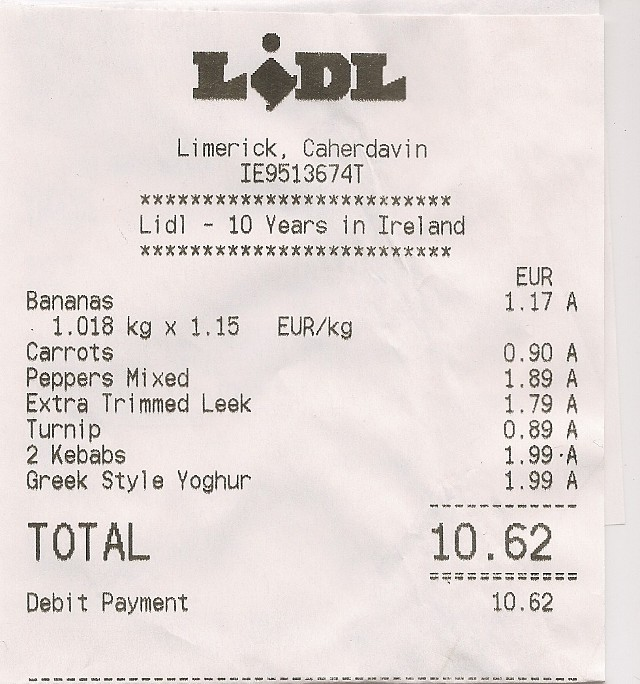

In [35]:
images = [Image.open(io.BytesIO(value.content.tobytes())) for value in uploader.value]
images[0]

In [ ]:
len(images)

In [37]:
instructions = [
    """
    Você é um especialista em finanças domésticas que está ajudando alguém a ter uma consciência melhor sobre os gastos.
    Na primeira interação, explique o que vê, faça um sumário breve dos recibos dizendo os locais, o gasto total e os itens mais comprados.
    """
]
instructions.extend(images)
instructions 

['\n    Você é um especialista em finanças domésticas que está ajudando alguém a ter uma consciência melhor sobre os gastos.\n    Na primeira interação, explique o que vê, faça um sumário breve dos recibos dizendo os locais, o gasto total e os itens mais comprados.\n    ',
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=640x684>]

In [39]:
response = model.generate_content(instructions, stream=True)
response.resolve()
to_markdown(response.text)

>  Você comprou 6 itens na loja Lidl e o total da compra foi de 10,62 euros. Os itens mais comprados foram:
> 
> Bananas
> Cenouras
> Pimentões
> Alho francês
> 2 Kebab
> Iogurte grego

In [40]:
# remove a primeira instrução
instructions = images[:]

In [ ]:
# limitatações com a criação do chat
# https://github.com/google-gemini/generative-ai-python/issues/210

In [41]:
input_message = 'Quais as suas perguntas? Digite FIM para encerrar: ' 
prompt = input(input_message)

while prompt.lower() != "fim":
    instructions.append(prompt)
    response = model.generate_content(instructions, stream=True)
    response.resolve()
    print("Resposta:", response.text, '\n\n')
    instructions = images[:]  # nova lista mas inicializada com as images
    prompt = input(input_message)


Quais as suas perguntas? Digite FIM para encerrar:  Quanto eu gastei com legumes?


Resposta:  Você gastou 4,66 euros em legumes. 




Quais as suas perguntas? Digite FIM para encerrar:  FIM
